In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd #Data Manipulation
import seaborn as sns #Data Visualization
import numpy as np #Numerical Python


In [2]:
df = pd.read_csv("Fraud_check.csv")
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


# EDA and VIsualization

In [3]:
#

In [4]:
# Selecting duplicate rows except first
# occurrence based on all columns
duplicate = df[df.duplicated()]
 
duplicate

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban


# converting numerical column into categorical variables

In [5]:
df1=df.assign(status=pd.cut(df['Taxable.Income'],bins=[0,30000,99999999999],labels=['risky','good'])) #to convert numerical data into categorical
# values we use .cut , bins shows range

In [6]:
df1

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good
...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,good
596,YES,Divorced,69967,55369,2,YES,good
597,NO,Divorced,47334,154058,0,YES,good
598,YES,Married,98592,180083,17,NO,good


In [7]:
# checking null values

In [8]:
df1.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
status             0
dtype: int64

<AxesSubplot:>

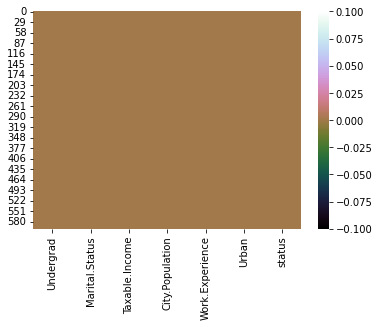

In [9]:
sns.heatmap(df1.isnull(),cmap="cubehelix") #Matrix plotting

In [10]:
# no null values

In [11]:
df.corr()

,Taxable.Income,City.Population,Work.Experience
Taxable.Income,1.000000,-0.064387,-0.001818
City.Population,-0.064387,1.000000,0.013135
Work.Experience,-0.001818,0.013135,1.000000


# One-Hot Encoding of categrical variables

In [12]:
df1.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,status
0,NO,Single,68833,50047,10,YES,good
1,YES,Divorced,33700,134075,18,YES,good
2,NO,Married,36925,160205,30,YES,good
3,YES,Single,50190,193264,15,YES,good
4,NO,Married,81002,27533,28,NO,good


In [13]:
# One-Hot Encoding of categrical variables
df2=pd.get_dummies(df1,columns=['Marital.Status'])
df2

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,status,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,NO,68833,50047,10,YES,good,0,0,1
1,YES,33700,134075,18,YES,good,1,0,0
2,NO,36925,160205,30,YES,good,0,1,0
3,YES,50190,193264,15,YES,good,0,0,1
4,NO,81002,27533,28,NO,good,0,1,0
...,...,...,...,...,...,...,...,...,...
595,YES,76340,39492,7,YES,good,1,0,0
596,YES,69967,55369,2,YES,good,1,0,0
597,NO,47334,154058,0,YES,good,1,0,0
598,YES,98592,180083,17,NO,good,0,1,0


# Labelling or label encoder

In [14]:
df2["Urban"] = df2["Urban"].replace({"YES":1,"NO":0}) #labeling: LabelEncoder
df2["status"] = df2["status"].replace({"risky":0,"good":1}) #labeling: LabelEncoder
df2["Undergrad"] = df2["Undergrad"].replace({"YES":1,"NO":0})

In [15]:
df2

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,status,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,1,0,0,1
1,1,33700,134075,18,1,1,1,0,0
2,0,36925,160205,30,1,1,0,1,0
3,1,50190,193264,15,1,1,0,0,1
4,0,81002,27533,28,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,76340,39492,7,1,1,1,0,0
596,1,69967,55369,2,1,1,1,0,0
597,0,47334,154058,0,1,1,1,0,0
598,1,98592,180083,17,0,1,0,1,0


In [16]:
df2.corr()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
Undergrad,1.000000,-0.049232,0.079579,-0.005362,-0.000267,-0.045101,0.015120,0.028883
Taxable.Income,-0.049232,1.000000,-0.064387,-0.001818,0.070628,0.062099,-0.100611,0.037910
City.Population,0.079579,-0.064387,1.000000,0.013135,-0.040098,0.004925,-0.007035,0.002087
Work.Experience,-0.005362,-0.001818,0.013135,1.000000,-0.094559,-0.014833,0.033347,-0.018123
Urban,-0.000267,0.070628,-0.040098,-0.094559,1.000000,-0.065518,0.016771,0.047014
Marital.Status_Divorced,-0.045101,0.062099,0.004925,-0.014833,-0.065518,1.000000,-0.468757,-0.510435
Marital.Status_Married,0.015120,-0.100611,-0.007035,0.033347,0.016771,-0.468757,1.000000,-0.520317
Marital.Status_Single,0.028883,0.037910,0.002087,-0.018123,0.047014,-0.510435,-0.520317,1.000000


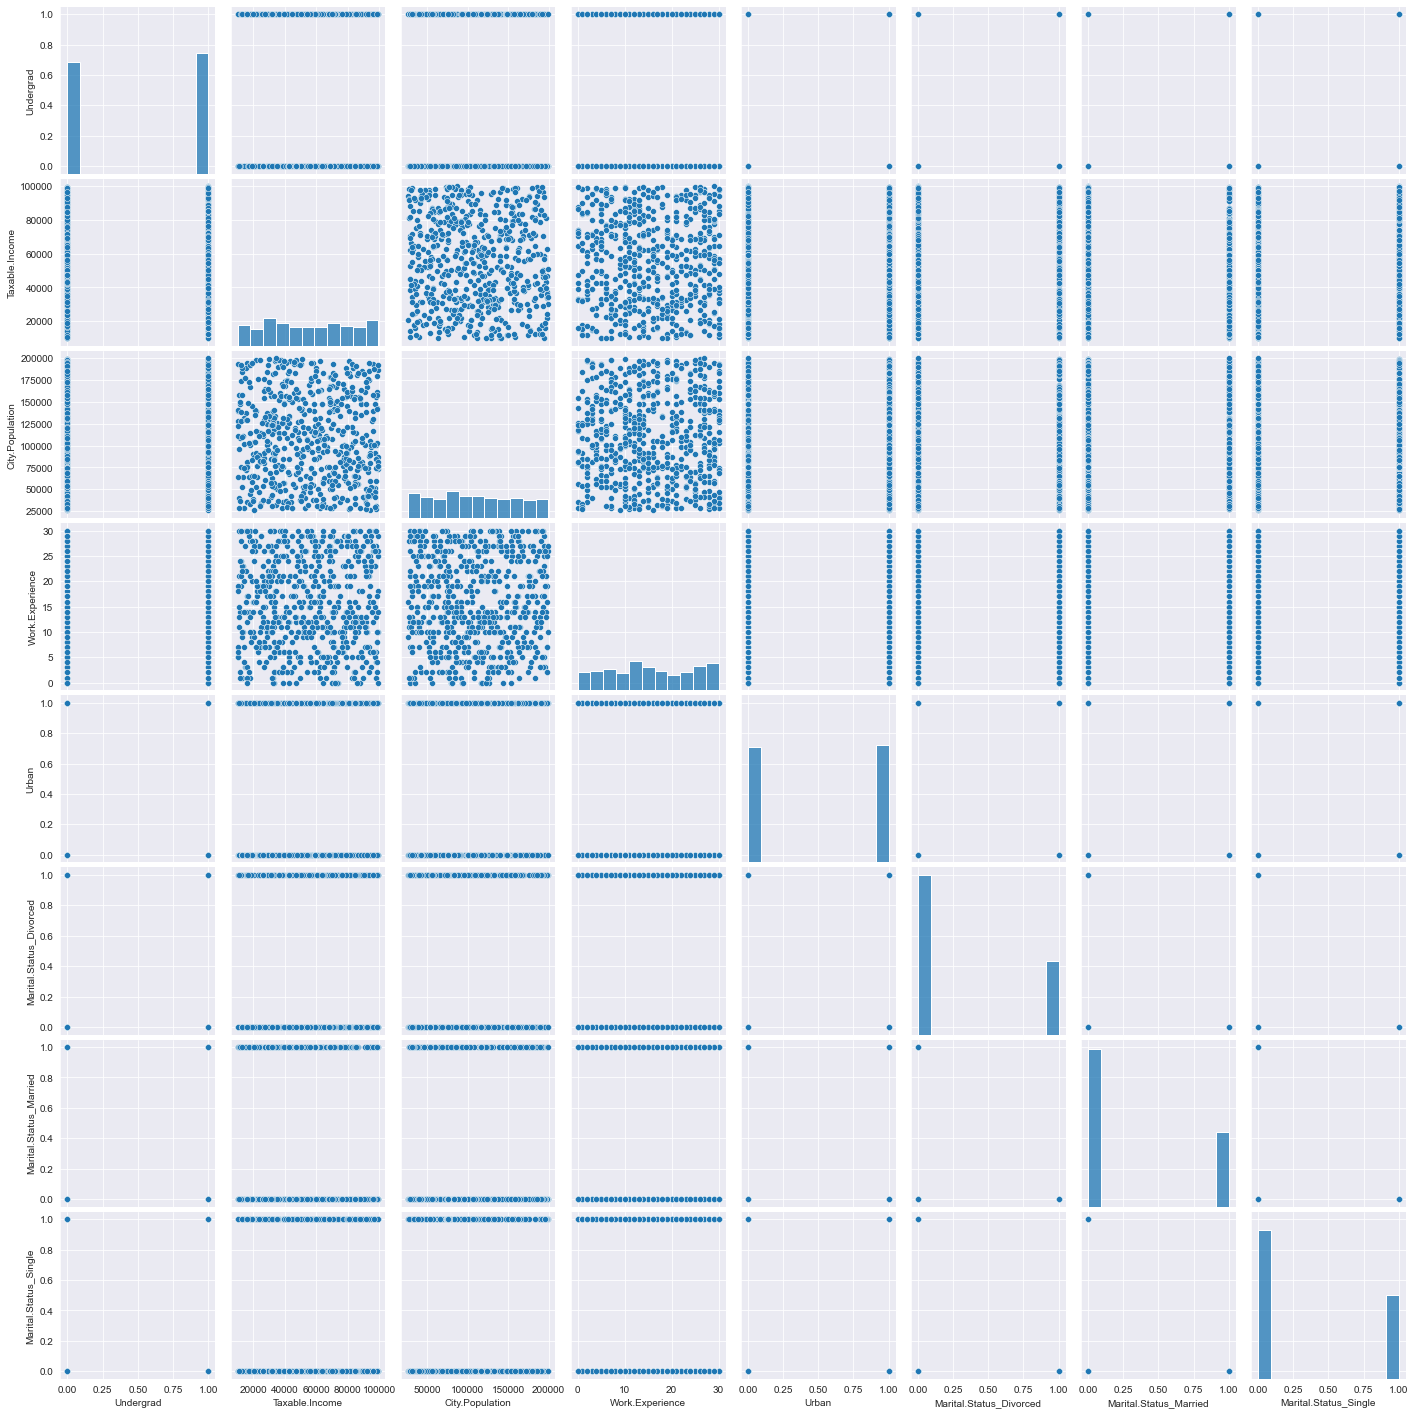

In [17]:
sns.set_style(style='darkgrid')
sns.pairplot(df2)

In [18]:
# work experience has very wea relation with taxable income so we remove it

# removing column and rearranging the columns

In [19]:
df2.head()

,Undergrad,Taxable.Income,City.Population,Work.Experience,Urban,status,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
0,0,68833,50047,10,1,1,0,0,1
1,1,33700,134075,18,1,1,1,0,0
2,0,36925,160205,30,1,1,0,1,0
3,1,50190,193264,15,1,1,0,0,1
4,0,81002,27533,28,0,1,0,1,0


In [20]:
dff=pd.concat([df2.iloc[:,0:1],df2.iloc[:,2:5],df2.iloc[:,6:18],df2.iloc[:,5:6]],axis=1) # rearranging the columns
dff

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,status
0,0,50047,10,1,0,0,1,1
1,1,134075,18,1,1,0,0,1
2,0,160205,30,1,0,1,0,1
3,1,193264,15,1,0,0,1,1
4,0,27533,28,0,0,1,0,1
...,...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,0,1
596,1,55369,2,1,1,0,0,1
597,0,154058,0,1,1,0,0,1
598,1,180083,17,0,0,1,0,1


In [21]:
dff.head()

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,status
0,0,50047,10,1,0,0,1,1
1,1,134075,18,1,1,0,0,1
2,0,160205,30,1,0,1,0,1
3,1,193264,15,1,0,0,1,1
4,0,27533,28,0,0,1,0,1


In [22]:
dff.corr()

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single
Undergrad,1.000000,0.079579,-0.005362,-0.000267,-0.045101,0.015120,0.028883
City.Population,0.079579,1.000000,0.013135,-0.040098,0.004925,-0.007035,0.002087
Work.Experience,-0.005362,0.013135,1.000000,-0.094559,-0.014833,0.033347,-0.018123
Urban,-0.000267,-0.040098,-0.094559,1.000000,-0.065518,0.016771,0.047014
Marital.Status_Divorced,-0.045101,0.004925,-0.014833,-0.065518,1.000000,-0.468757,-0.510435
Marital.Status_Married,0.015120,-0.007035,0.033347,0.016771,-0.468757,1.000000,-0.520317
Marital.Status_Single,0.028883,0.002087,-0.018123,0.047014,-0.510435,-0.520317,1.000000


# there is multicollinarity problem in marital.status _ married , unmarried and single , if we consider it in feature then our model becommes overfitted so we have to remove any two of them to make good model.

# Split features and target

In [23]:
dff.head()

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Divorced,Marital.Status_Married,Marital.Status_Single,status
0,0,50047,10,1,0,0,1,1
1,1,134075,18,1,1,0,0,1
2,0,160205,30,1,0,1,0,1
3,1,193264,15,1,0,0,1,1
4,0,27533,28,0,0,1,0,1


In [24]:
X=dff.iloc[:,[0,1,2,3,5]]
y=dff["status"].values
X.head()

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Married
0,0,50047,10,1,0
1,1,134075,18,1,0
2,0,160205,30,1,1
3,1,193264,15,1,0
4,0,27533,28,0,1


In [25]:
y

[1, 1, 1, 1, 1, ..., 1, 1, 1, 1, 1]
Length: 600
Categories (2, int64): [0 < 1]

In [26]:
# standarization not required

# Train and test split¶

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.75,random_state=42)

# Model Creation

In [29]:
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier(criterion='gini')
model.fit(X_train,y_train)

DecisionTreeClassifier()

# Model Validation: Confusion Matrix

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
cm

array([[ 9, 24],
       [21, 96]], dtype=int64)

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.30      0.27      0.29        33
           1       0.80      0.82      0.81       117

    accuracy                           0.70       150
   macro avg       0.55      0.55      0.55       150
weighted avg       0.69      0.70      0.69       150



In [32]:
accuracy_score(y_test,y_pred)

0.7

In [33]:
y_pred1 = model.predict(X_train)
accuracy_score(y_train,y_pred1)

1.0

# Model Visualization & Tree Visualization

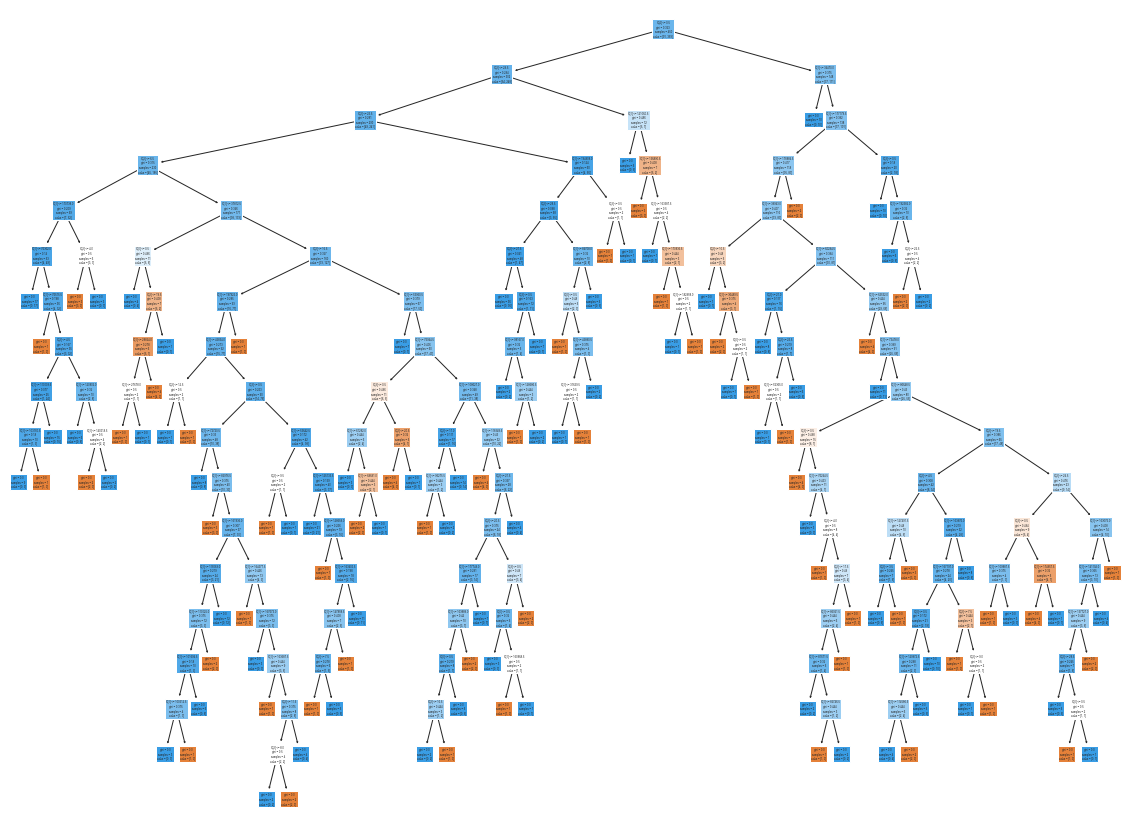

In [34]:
from sklearn import tree
plt.figure(figsize=(20,15))
tree.plot_tree(model,filled=True)

plt.show()

In [35]:
X

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Married
0,0,50047,10,1,0
1,1,134075,18,1,0
2,0,160205,30,1,1
3,1,193264,15,1,0
4,0,27533,28,0,1
...,...,...,...,...,...
595,1,39492,7,1,0
596,1,55369,2,1,0
597,0,154058,0,1,0
598,1,180083,17,0,1


# K-Fold Testing: help us to find out stability of the accuracy

In [36]:
from sklearn.model_selection import KFold,cross_val_score

In [37]:
fold = KFold(n_splits=10,shuffle=False)

In [38]:
model1 = DecisionTreeClassifier()

results = cross_val_score(model,X,y,cv = fold)

In [39]:
results.min(),results.max()

(0.5666666666666667, 0.75)

In [40]:
results.std()

0.05467073155618909

In [41]:
results.mean()

0.6466666666666667

# pruning tree

In [83]:
model2 = DecisionTreeClassifier(criterion="entropy",ccp_alpha=0.0)

In [84]:
path = model2.cost_complexity_pruning_path(X_train,y_train)

In [85]:
ccp_alphas = path.ccp_alphas 

In [86]:
ccp_alphas

array([0.        , 0.00296296, 0.00296296, 0.00296296, 0.00306099,
       0.00355556, 0.00360568, 0.00360568, 0.00399751, 0.00401071,
       0.00409814, 0.00422252, 0.00433348, 0.00442591, 0.00444444,
       0.00444444, 0.00444444, 0.00453743, 0.00453743, 0.00475935,
       0.00482539, 0.00528312, 0.00533836, 0.00565591, 0.00575309,
       0.00586074, 0.00609652, 0.00622259, 0.00629882, 0.00640763,
       0.00694808, 0.00706881, 0.00721136, 0.00728842, 0.00744717,
       0.00766292, 0.00783003, 0.00795177, 0.0090914 ])

In [87]:
train_score = []
test_score = []

for i in ccp_alphas:
    model1 = DecisionTreeClassifier(ccp_alpha=i)
    model1.fit(X_train,y_train)
    train_score.append(model1.score(X_train,y_train))
    test_score.append(model1.score(X_test,y_test))    
train_score

[1.0,
 0.8822222222222222,
 0.8822222222222222,
 0.8822222222222222,
 0.8777777777777778,
 0.8622222222222222,
 0.8622222222222222,
 0.8622222222222222,
 0.86,
 0.86,
 0.8422222222222222,
 0.8288888888888889,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778,
 0.7977777777777778]

In [88]:
model1.score(X_test,y_test)

0.78

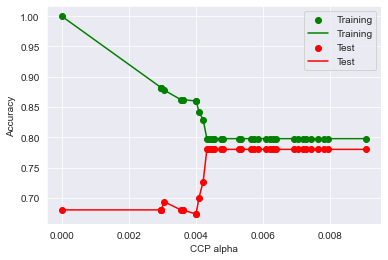

In [89]:
plt.scatter(ccp_alphas,train_score,color="green",label="Training")
plt.plot(ccp_alphas,train_score,color="green",label="Training")
plt.scatter(ccp_alphas,test_score,color = "red",label="Test")
plt.plot(ccp_alphas,test_score,color = "red",label="Test")
plt.xlabel("CCP alpha")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [90]:
model1.score(X_test,y_test) 

0.78

In [91]:
model1.score(X_train,y_train)

0.7977777777777778

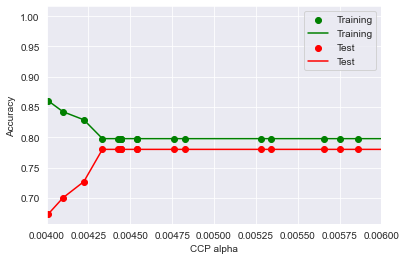

In [92]:
plt.scatter(ccp_alphas,train_score,color="green",label="Training")
plt.plot(ccp_alphas,train_score,color="green",label="Training")
plt.scatter(ccp_alphas,test_score,color = "red",label="Test")
plt.plot(ccp_alphas,test_score,color = "red",label="Test")
plt.xlabel("CCP alpha")
plt.ylabel("Accuracy")
plt.xlim(0.004,0.006)
plt.legend()
plt.show()

In [103]:
final_model = DecisionTreeClassifier(ccp_alpha=0.00453743,max_depth=5,criterion="entropy")
final_model.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.00453743, criterion='entropy', max_depth=5)

In [104]:
y_pred = final_model.predict(X_test)
accuracy_score(y_test,y_pred)

0.76

In [105]:
y_pred1 = final_model.predict(X_train)
accuracy_score(y_train,y_pred1)

0.8088888888888889

In [106]:
final_model.score(X_test,y_test)

0.76

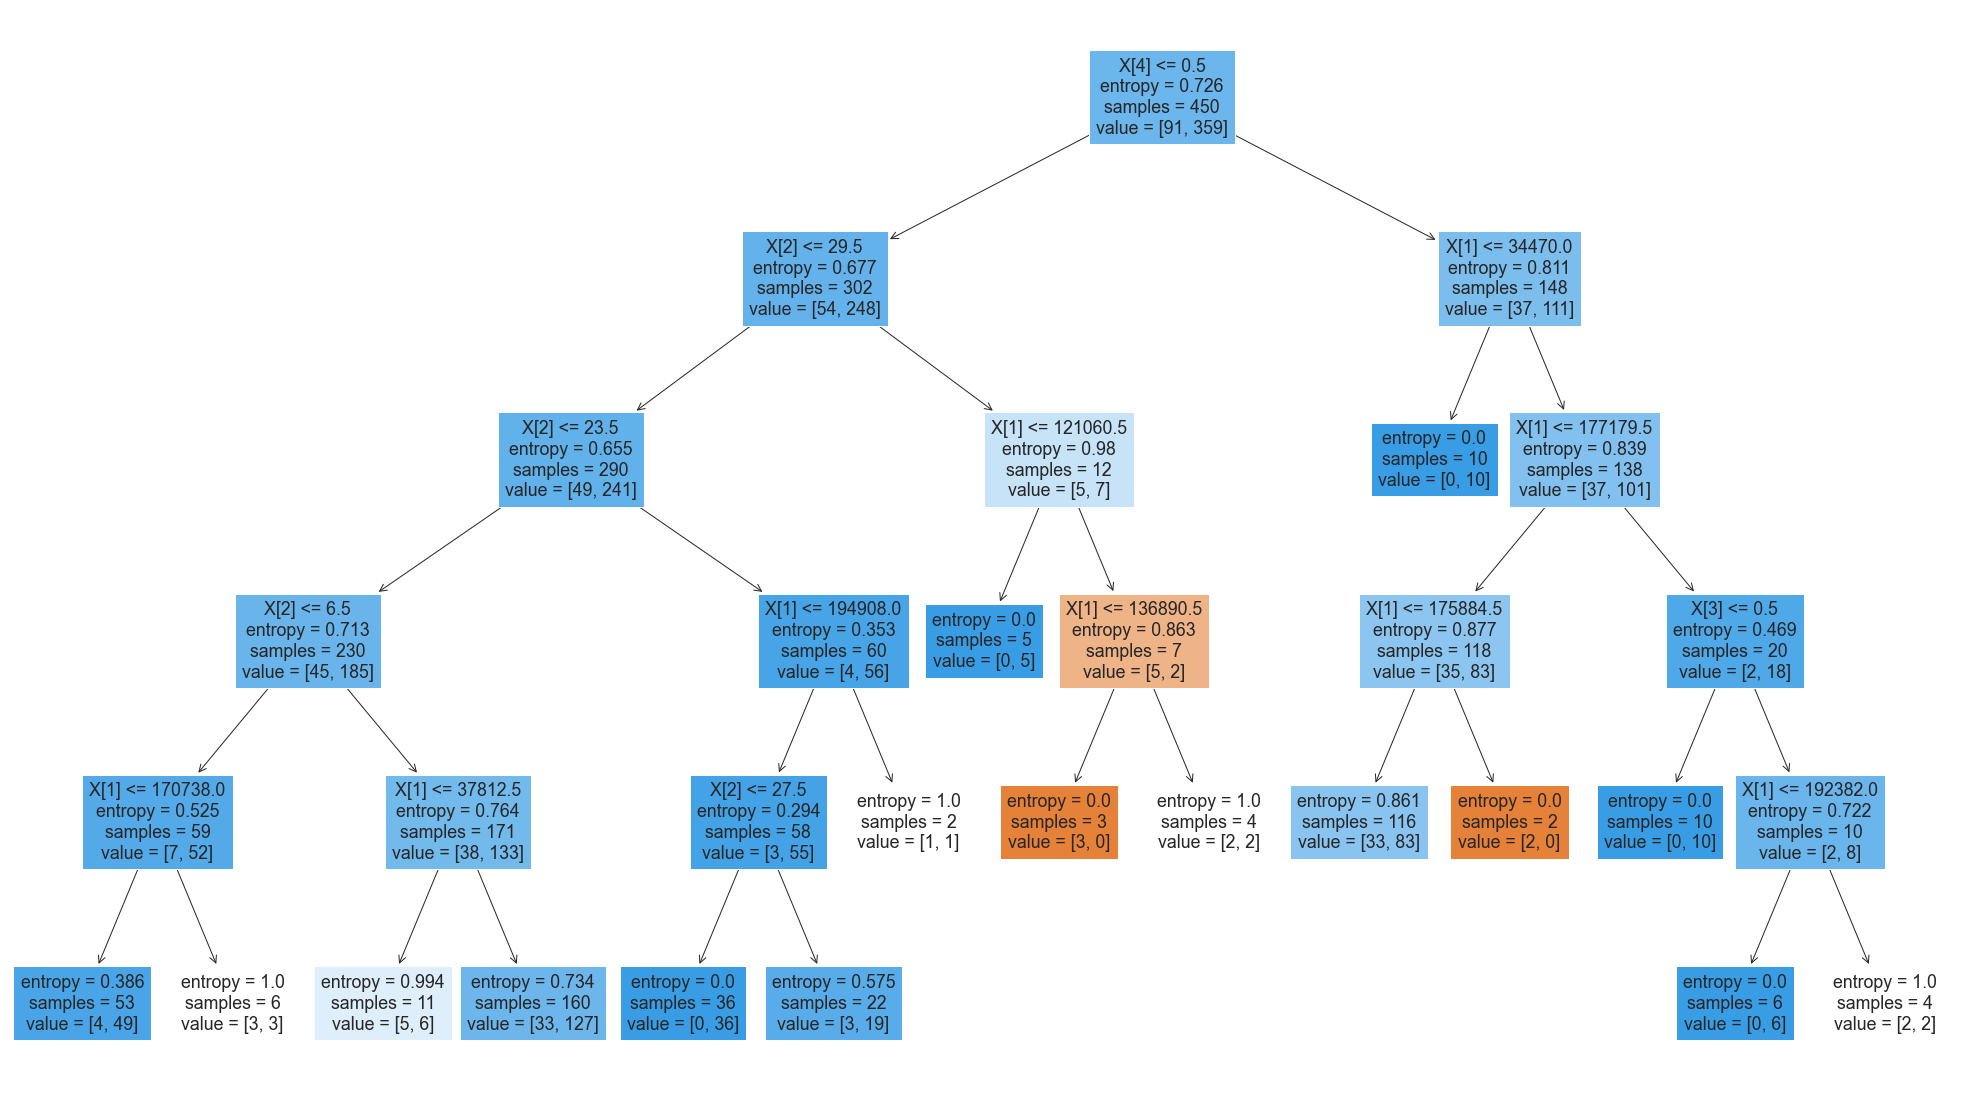

In [107]:
from sklearn import tree
plt.figure(figsize=(35,20))
tree.plot_tree(final_model,filled=True)

plt.show()

In [102]:
X

,Undergrad,City.Population,Work.Experience,Urban,Marital.Status_Married
0,0,50047,10,1,0
1,1,134075,18,1,0
2,0,160205,30,1,1
3,1,193264,15,1,0
4,0,27533,28,0,1
...,...,...,...,...,...
595,1,39492,7,1,0
596,1,55369,2,1,0
597,0,154058,0,1,0
598,1,180083,17,0,1
